In [62]:
# Basic segmentation based upon similar color regions
# Segmentation partition an image into regions having similar visual appearance corresponding to parts of objects


In [63]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

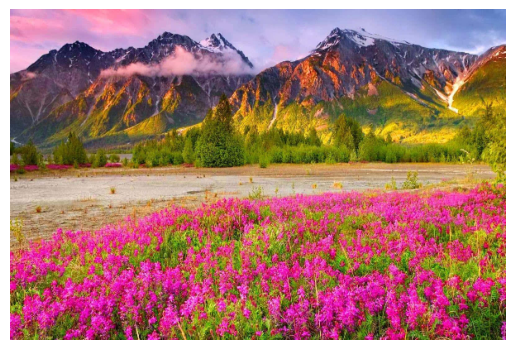

In [64]:
img=cv2.imread('./data/scene.jpeg');
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(600,400))
plt.axis("off")
plt.imshow(img)

In [65]:

# Each data points is a point in 3D space of RGB
# We will use KMeans to cluster these points
X=img.reshape((-1,3))
print(X.shape)


(240000, 3)


In [66]:
k=5;
model=KMeans(k);
model.fit(X);
centroids=model.cluster_centers_


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
print(centroids)
colors=np.array(centroids,dtype='uint8')
# Color Patch (100,100,3) -> 100x100 image with 3 channels

[[133.27210414 111.73577752  30.5865302 ]
 [214.60772382  56.14987662 135.89698378]
 [198.87453032 168.97903501 199.88059351]
 [ 82.7976649   61.43795046  55.58218205]
 [195.48241435 147.45530103  83.36428137]]


(-0.5, 19.5, 19.5, -0.5)

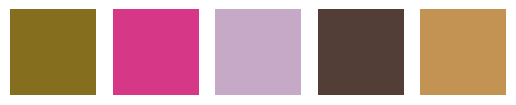

In [68]:

i=1
for color in colors:
    plt.subplot(1,k,i)
    i+=1
    patch=np.zeros((20,20,3),dtype='uint8')
    patch[:,:,:]=color;
    plt.axis("off")
    plt.imshow(patch)

plt.axis("off")

# mat=np.zeros((100,100,3),dtype='uint8')
# mat[:,:,0]=200
# plt.axis("off")
# plt.imshow(mat)

In [69]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [70]:
model.labels_.shape

(240000,)

In [71]:
new_img=np.zeros(X.shape,dtype='uint8')
print(new_img.shape)

(240000, 3)


In [72]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[model.labels_[i]]

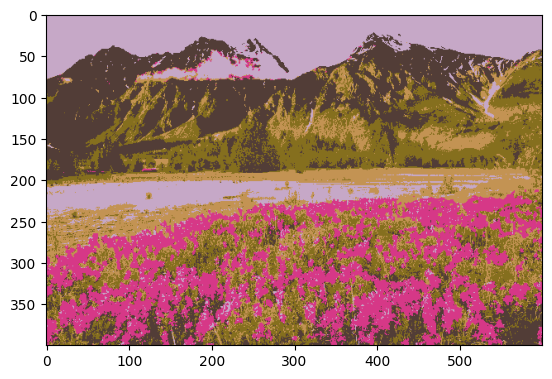

In [73]:
plt.imshow(new_img.reshape(img.shape))